# Precision Benchmark

In [2]:
import sys
sys.path.insert(0, '../../../src_tf/')

import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
import multiprocessing as mp
import random
import pickle

from qiskit.quantum_info import DensityMatrix, random_unitary
from qiskit.quantum_info import Operator
from scipy.linalg import sqrtm
from tqdm.notebook import tqdm

from loss_functions import *
from optimization import *
from quantum_channel import *
from kraus_channels import *
from quantum_tools import *
from experimental import *
from spam import *
from timedependent_channels import *

#np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(precision=5, suppress=True)

#import os
#os.environ["CUDA_VISIBLE_DEVICES"] = "-1"

# Spin-Spin Hamiltonian, No Decoherence

## Degree 5

In [45]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=5)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list1 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


## Degree 10

In [46]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=10)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list2 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


## Degree 20

In [47]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=20)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list3 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


## Degree 40

In [48]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=40)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list4 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


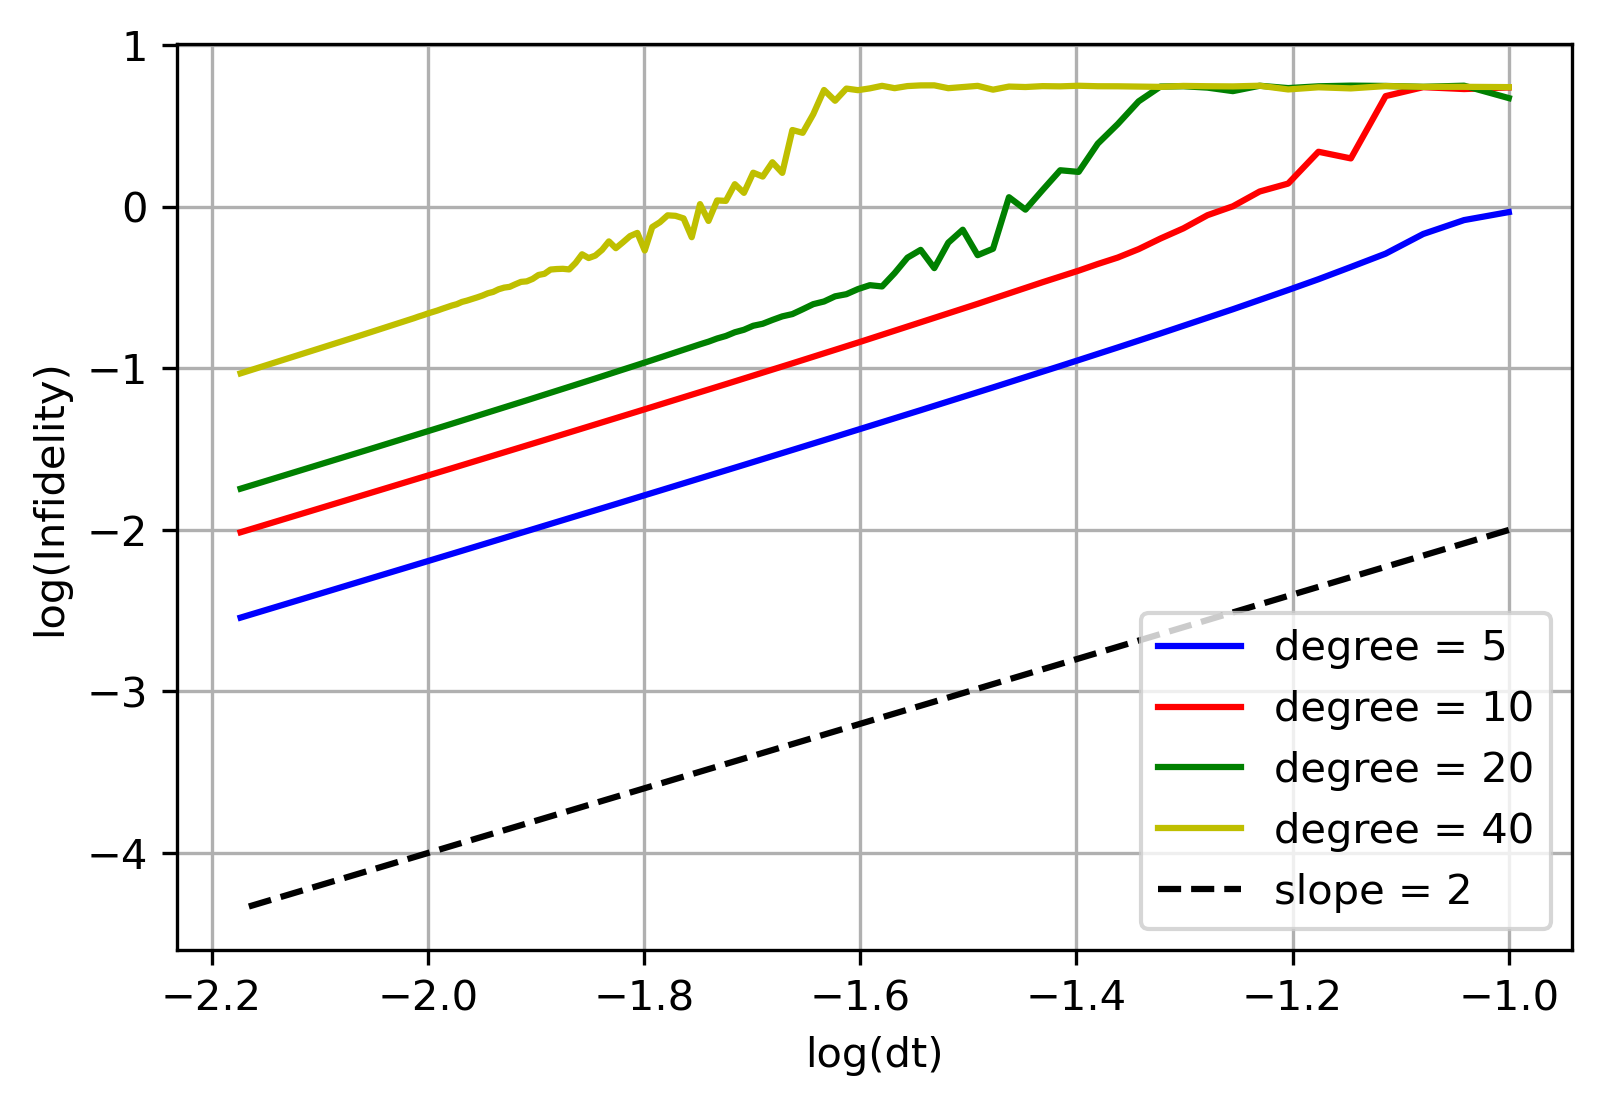

In [91]:
dt_list = 1/np.arange(10, 150)


fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(np.log10(dt_list), np.log10(infidelity_list1), "b-")
plt.plot(np.log10(dt_list), np.log10(infidelity_list2), "r-")
plt.plot(np.log10(dt_list), np.log10(infidelity_list3), "g-")
plt.plot(np.log10(dt_list), np.log10(infidelity_list4), "y-")

plt.plot(np.log10(dt_list), 2*np.log10(dt_list), "k--")
plt.xlabel("log(dt)")
plt.ylabel("log(Infidelity)")
plt.legend(["degree = 5", "degree = 10", "degree = 20", "degree = 40", "slope = 2"])
plt.grid()
plt.savefig("figures/" + "noiseless_precision.pdf", bbox_inches='tight')
plt.show()

## Spin-Spin Hamiltonian, with Decoherence

In [56]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=5)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list5 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


In [57]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=10)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list6 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


In [58]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=20)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list7 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


In [59]:
n = 2
d = 2**n

tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=40)

lindblad_model = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 2
                                   )
channel_list = [MagnusPropagator(liouvillian=lindblad_model, grid_size=grid_size,T = 1) for grid_size in range(10, 150)]

channel_model_gt = MagnusPropagator(liouvillian=lindblad_model, grid_size=10000, T = 1)

choi_gt = channel_model_gt.choi

choi_list =  [channel.choi for channel in channel_list]
infidelity_list8 = [np.linalg.norm(choi - choi_gt) for choi in choi_list]


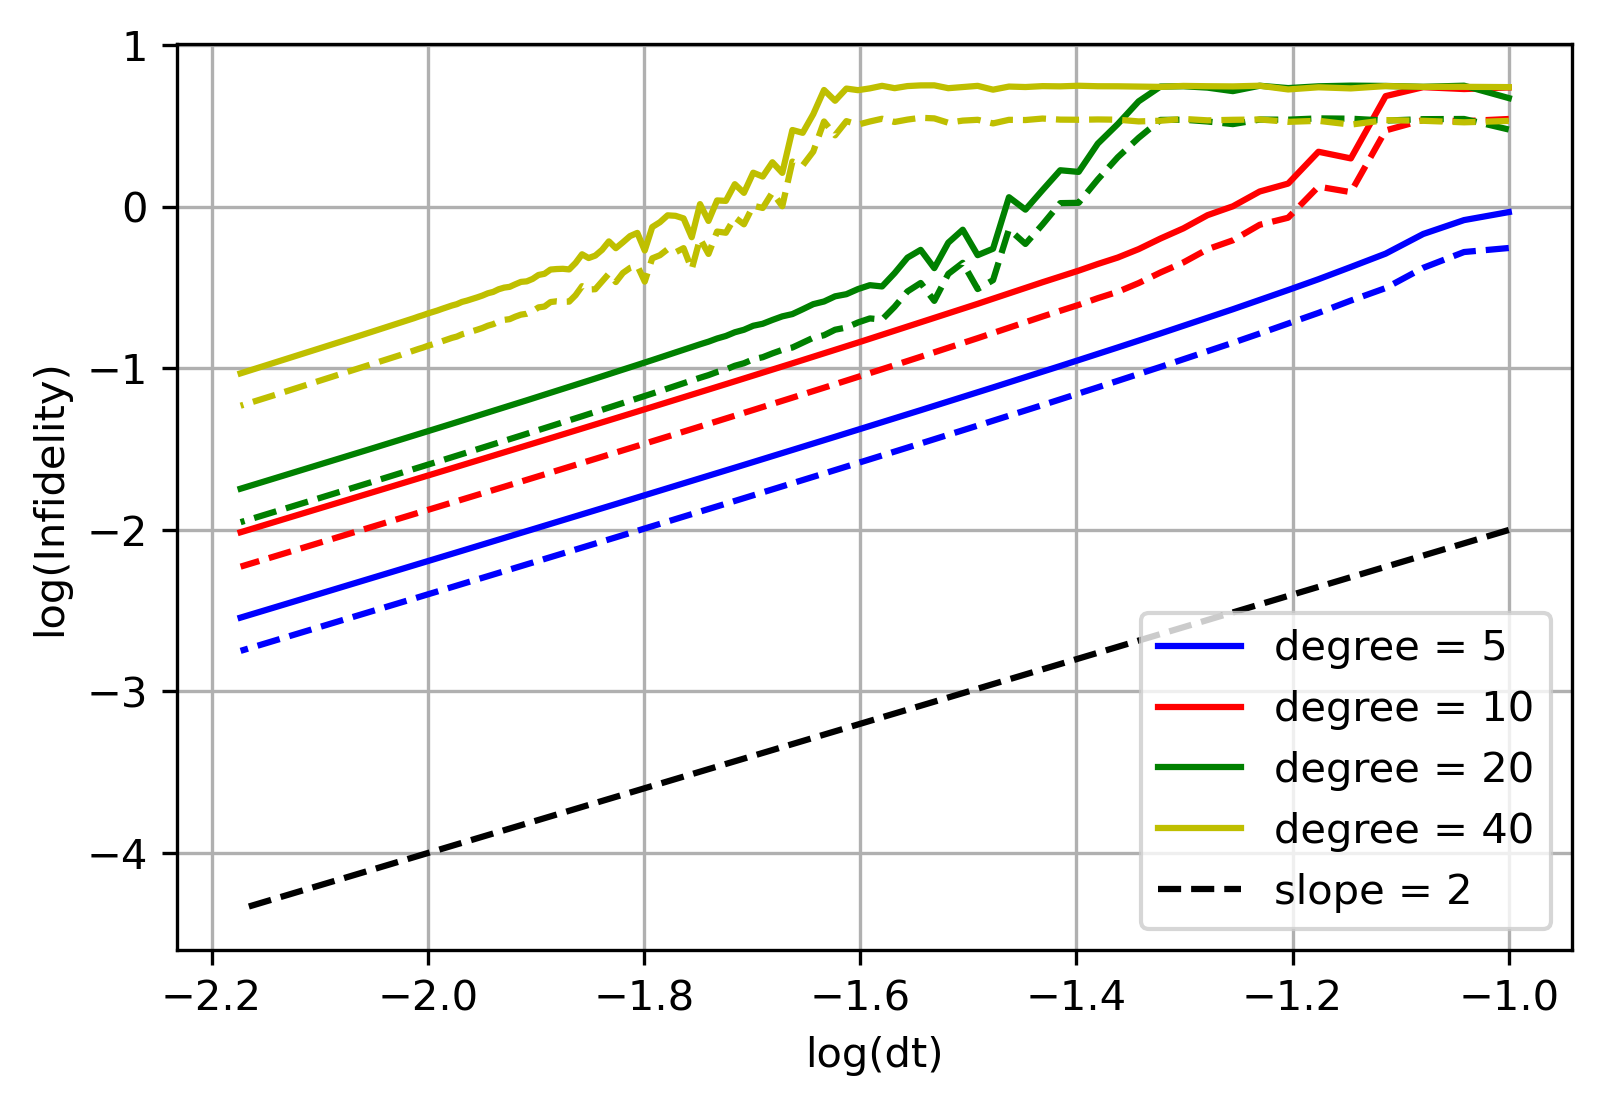

In [92]:
dt_list = 1/np.arange(10, 150)

fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')

plt.plot(np.log10(dt_list), np.log10(infidelity_list1), "b-")
plt.plot(np.log10(dt_list), np.log10(infidelity_list2), "r-")
plt.plot(np.log10(dt_list), np.log10(infidelity_list3), "g-")
plt.plot(np.log10(dt_list), np.log10(infidelity_list4), "y-")

plt.plot(np.log10(dt_list), 2*np.log10(dt_list), "k--")


plt.plot(np.log10(dt_list), np.log10(infidelity_list5), "b--")
plt.plot(np.log10(dt_list), np.log10(infidelity_list6), "r--")
plt.plot(np.log10(dt_list), np.log10(infidelity_list7), "g--")
plt.plot(np.log10(dt_list), np.log10(infidelity_list8), "y--")

plt.xlabel("log(dt)")
plt.ylabel("log(Infidelity)")
plt.legend(["degree = 5", "degree = 10", "degree = 20", "degree = 40", "slope = 2"])
plt.grid()
plt.savefig("figures/" + "noise_precision.pdf", bbox_inches='tight')
plt.show()

## Visualization of Magnetic Field

In [82]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=5)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 10000)

signal1 = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal1 += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal1 += theta*np.cos(2*np.pi*i*t)

In [83]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=10)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 10000)

signal2 = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal2 += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal2 += theta*np.cos(2*np.pi*i*t)

In [84]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=20)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 10000)

signal3 = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal3 += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal3 += theta*np.cos(2*np.pi*i*t)

In [85]:
tf.random.set_seed(42)
np.random.seed(42)

H_model = SpinSpin(degree=40)

theta_sin = H_model.theta_sin.numpy().reshape(6,-1)
theta_cos = H_model.theta_cos.numpy().reshape(6,-1)


t = np.linspace(0, 1, 10000)

signal4 = 0
idx = 0
for i, theta in enumerate(zip(theta_sin[idx])):
    signal4 += theta*np.sin(2*np.pi*i*t)

for i, theta in enumerate(zip(theta_cos[idx])):
    signal4 += theta*np.cos(2*np.pi*i*t)

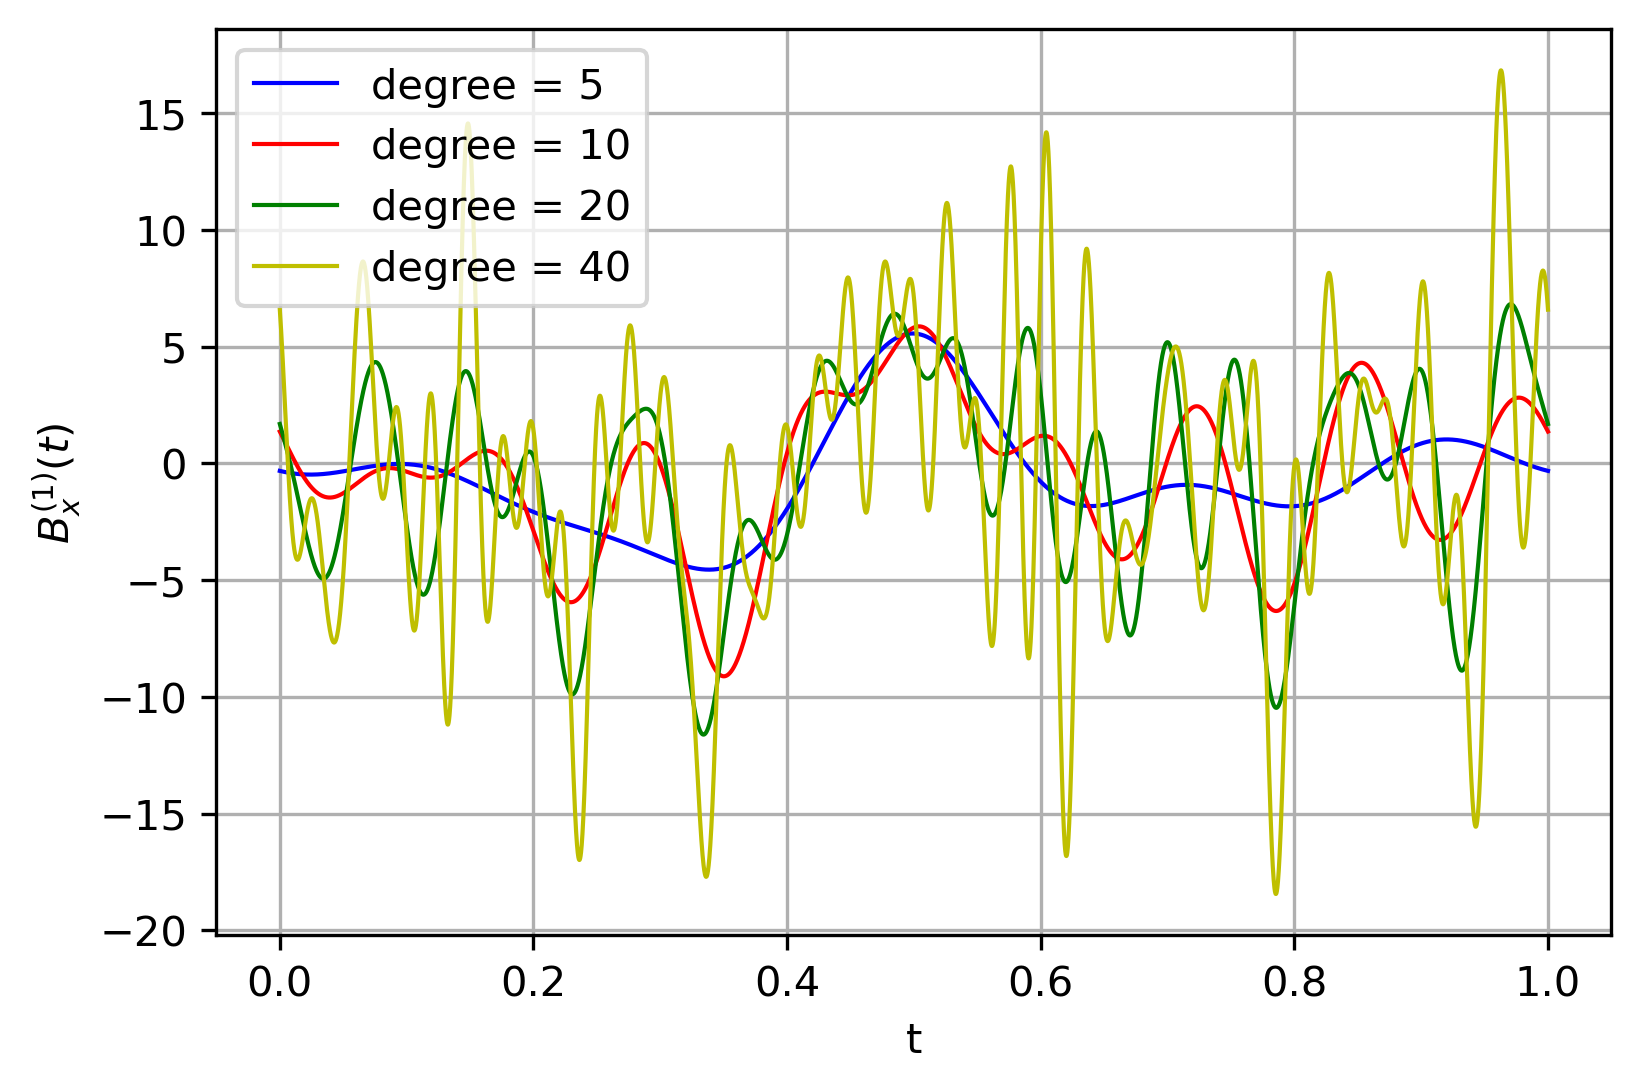

In [90]:
fig = plt.figure(figsize=(6,4), dpi = 300, facecolor='w', edgecolor='k')
plt.plot(t, signal1, "b-", linewidth=1)
plt.plot(t, signal2, "r-", linewidth=1)
plt.plot(t, signal3, "g-", linewidth=1)
plt.plot(t, signal4, "y-", linewidth=1)
plt.xlabel("t")
plt.ylabel("$B_x^{(1)}(t)$")
plt.legend(["degree = 5", "degree = 10", "degree = 20", "degree = 40"])
plt.grid()
plt.savefig("figures/" + "bx_signal.pdf", bbox_inches='tight')
plt.show()

## Noise Strength Sensitivity

In [47]:
tf.random.set_seed(42)
np.random.seed(42)

lindblad_model1 = LindbladGenerator(hamiltonian = H_model, 
                                   jump_operator = JumpOperator(4),
                                   gamma = 0
                                    )

lindblad_model2 = deepcopy(lindblad_model1)
lindblad_model2.gamma = 2

channel_model1 = MagnusPropagator(liouvillian=lindblad_model1, grid_size=1000)
channel_model2 = MagnusPropagator(liouvillian=lindblad_model2, grid_size=1000)

T = 1
choi1 = channel_model1.choi(T)
choi2 = channel_model2.choi(T)
print(state_fidelity(choi1, choi2)/16)

tf.Tensor(0.6229850753599123, shape=(), dtype=float64)


## Polynomial Hamiltonian

In [3]:
tf.random.set_seed(42)
np.random.seed(42)
n=3

U = random_unitary(2**n, seed=42).data
channel_target = ChoiMapStatic(U, mode="unitary")

lindblad_model = LindbladGenerator(hamiltonian = PolynomialHamiltonian(d=2**n, degree=10), 
                                   jump_operator = JumpOperator(2**n),
                                   gamma = 0
                                )


channel_model = MagnusPropagator(liouvillian=lindblad_model, grid_size=200, T=1)

model = ModelQuantumMap(
    channel=channel_model,
    loss_function=channel_mse_loss,
    optimizer=tf.optimizers.Adam(learning_rate=0.01),
    logger=Logger(loss_function=channel_fidelity_loss, sample_freq=1, N=0),
)

In [4]:
model.train(
        inputs=None,
        targets=[channel_target],
        num_iter=500,
        N=0,
        verbose=True,
    )

  0%|          | 0/500 [00:00<?, ?it/s]

-0.0530069540147814 None
-0.08979735545772388 None
-0.13086625668685253 None
-0.17344741963241242 None
-0.2152225684444259 None
-0.2543575724961067 None
-0.2902078656860804 None
-0.3231168437229395 None
-0.3538434246127757 None
-0.38318607352023076 None
-0.41194213625918763 None
-0.44080354407086486 None
-0.4701317530191157 None
-0.4998301384129827 None
-0.5294554802091247 None
-0.5584736088794171 None
-0.58643697369708 None
-0.6129695063401992 None
-0.6376888533058848 None
-0.6602133252285368 None
-0.6802380387060531 None
-0.6976430917172758 None
-0.7126435835822164 None
-0.7258579024707288 None
-0.7381138214686626 None
-0.7501017404112432 None
-0.7621479461824766 None
-0.7742211190509866 None
-0.7860987934343375 None
-0.7975670234599049 None
-0.8085463298415556 None
-0.8190966616291788 None
-0.829342925371075 None
-0.8393945777049793 None
-0.8492974703620687 None
-0.8590264028718081 None
-0.8685132947156459 None
-0.8776881059909862 None
-0.8865013169532717 None
-0.8949184988566958 No

KeyboardInterrupt: 